In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bioframe
import scipy.stats as stats 


In [2]:
##### for each condition split genes into 3, ctr hi, wapl hi, others
ctr_high = bioframe.read_table('/home/kimj50/cohesin_paper/_notebook_v3/highlow/c_elegans.WS220.annotations_gtf_genes_codingtranscript_controlhigh_values_within40kbjet.bed',sep='\t',schema='bed9')
wapl_high = bioframe.read_table('/home/kimj50/cohesin_paper/_notebook_v3//highlow/c_elegans.WS220.annotations_gtf_genes_codingtranscript_waplhigh_values_within40kbjet.bed',sep='\t',schema='bed9')

jets = bioframe.read_table('/home/kimj50/cohesin_paper/jets_call/jetcall_v5_w30kb.bed',schema='bed6')
jk05_1hr = pd.read_csv('/scratch/cgsb/ercan/Haoyu/SMC3_WAPL1_degron_mRNAseq/JK05_06_CA1200_control/JK05_1hrauxin_RNASeq/output/DEseq2FC_JK05_1hr_control_CA1200_trt_over_ctr.tab',sep='\t')
jk06_1hr = pd.read_csv('/scratch/cgsb/ercan/Haoyu/SMC3_WAPL1_degron_mRNAseq/JK05_06_CA1200_control/JK06_1hrauxin_RNASeq/output/DEseq2FC_JK06_1hr_control_CA1200_trt_over_ctr.tab',sep='\t')



In [3]:
# group RNA seq data into 3 categories
a = jk05_1hr.gene.isin(ctr_high.name)
b = jk05_1hr.gene.isin(wapl_high.name)
c = np.invert(np.logical_or(a,b))

jk05_1hr_ctrhi = jk05_1hr[a]
jk05_1hr_waplhi = jk05_1hr[b]
jk05_1hr_others = jk05_1hr[c]


a = jk06_1hr.gene.isin(ctr_high.name)
b = jk06_1hr.gene.isin(wapl_high.name)
c = np.invert(np.logical_or(a,b))

jk06_1hr_ctrhi = jk06_1hr[a]
jk06_1hr_waplhi = jk06_1hr[b]
jk06_1hr_others = jk06_1hr[c]

d1 = [jk05_1hr_ctrhi,jk05_1hr_waplhi,jk05_1hr_others]
d2 = [jk06_1hr_ctrhi,jk06_1hr_waplhi,jk06_1hr_others]


SMC3 depletion
817 1268 15800
0.00015038796393847053 0.005632348044841139
WAPL depletion
817 1264 15950
5.550682424805493e-08 0.00767263798404543


(-3.0, 3.0)

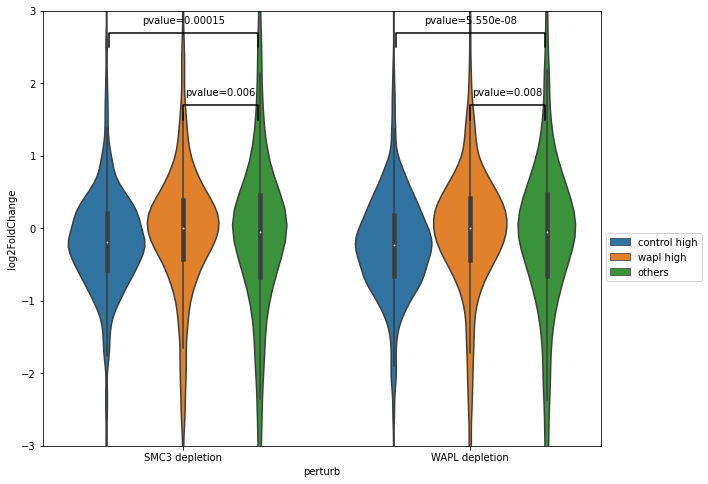

In [4]:
####### violin plot
f = plt.figure(figsize=(10,8))

d12 = [d1,d2]

G = ['control high', 'wapl high', 'others']
P = ['SMC3 depletion', 'WAPL depletion']
d_all = []
for j in range(2):
    d = []
    for i in range(3):
        di = d12[j][i].copy()
        di['Group'] = G[i]
        d.append(di)
    d_pd = pd.concat(d)
    d_pd['perturb'] = P[j]
    d_all.append(d_pd)
d_all_pd = pd.concat(d_all)
sns.violinplot(data=d_all_pd,x="perturb", y="log2FoldChange", hue="Group",
              bw=0.2)
#####################
plt.legend(bbox_to_anchor=(1, 0.5))


for i in range(2):
    print(P[i])
    a = d12[i][0].log2FoldChange
    b = d12[i][1].log2FoldChange
    c = d12[i][2].log2FoldChange
    print(len(a),len(b),len(c))
    print(stats.mannwhitneyu(a, c)[1],stats.mannwhitneyu(b, c)[1])



# statistical annotation
x1, x2 = -0.26,0.26
#y, h, col = d_all_pd['log2FoldChange'].max() + 2, 2, 'k'
y, h, col = 2.5, 0.2, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.1, "pvalue=0.00015", ha='center', va='bottom', color=col)

# statistical annotation
x1, x2 = 0,0.26
y, h, col = 1.5, 0.2, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.1, "pvalue=0.006", ha='center', va='bottom', color=col)


# statistical annotation
x1, x2 = 0.74,1.26
y, h, col = 2.5, 0.2, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.1, "pvalue=5.550e-08", ha='center', va='bottom', color=col)

# statistical annotation
x1, x2 = 1,1.26
y, h, col = 1.5, 0.2, 'k'

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.1, "pvalue=0.008", ha='center', va='bottom', color=col)



plt.ylim(-3,3)
